# Impact Data functionalities


Import data from EM-DAT CSV file and initiate Impact()-object

## Data Source:
www.emdat.be




In [1]:
"""Load required packages and set path to CSV-file from EM-DAT"""

import os
import numpy as np
import pandas as pd
from climada.engine.impact_data import emdat_countries_by_hazard, \
    emdat_impact_yearlysum, emdat_impact_event, emdat_to_impact, emdat_df_load

from climada.util.constants import DATA_DIR


DEV_DIR = '/Users/eberenzs/Documents/Projects/dev_climada_python'

EMDAT_CSV = os.path.join(DEV_DIR, 'TC' + '_Calibration', 'data', 'emdat_201810.csv')

emdat_file_path = os.path.join(DATA_DIR, 'demo', 'demo_emdat_impact_data_2020.csv')


2020-06-17 18:36:28,859 - climada - DEBUG - Loading default config file: /Users/eberenzs/Documents/Projects/climada_python/climada/conf/defaults.conf


In [2]:
"""get list of countries impacted by tropical cyclones from 2000 to 2019"""

iso3_codes, country_names = emdat_countries_by_hazard('TC', emdat_file_path, year_range=(2000, 2019))

print(country_names)


['American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Australia', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Bermuda', 'Bhutan', 'Brazil', 'Cabo Verde', 'Cambodia', 'Canada', 'Cayman Islands', 'China', 'Colombia', 'Comoros', 'Congo, Democratic Republic of the', 'Cook Islands', 'Costa Rica', 'Cuba', 'Djibouti', 'Dominica', 'Dominican Republic', 'El Salvador', 'Fiji', 'French Polynesia', 'Grenada', 'Guam', 'Guatemala', 'Haiti', 'Honduras', 'Hong Kong', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Jamaica', 'Japan', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', "Lao People's Democratic Republic", 'Macao', 'Madagascar', 'Malawi', 'Marshall Islands', 'Mauritius', 'Mexico', 'Micronesia, Federated States of', 'Morocco', 'Mozambique', 'Myanmar', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niue', 'Northern Mariana Islands', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Philippines', 'Portugal', 'Puerto Rico', 'Russian Federation', 'Réun

In [3]:
""" init CLIMADA Impact set from EM-DAT CSV"""

impact_emdat, countries = emdat_to_impact(emdat_file_path, \
                                    hazard_type_climada='TC', year_range=(2000,2009))

print('Number of TC events in EM-DAT 2000 to 2009 globally: %i' %(impact_emdat.event_id.size))

impact_emdat_PHL, countries = emdat_to_impact(emdat_file_path, countries='PHL', \
                                    hazard_type_climada='TC', year_range=(2013,2013), imp_str="Total Affected")

print('TC events in EM-DAT in the Philipppines, 2013: %i' %(impact_emdat_PHL.event_id.size))
print('People affected by TC events in the Philippines in 2013 (per event):')
print(impact_emdat_PHL.at_event)
print('People affected by TC events in the Philippines in 2013 (total):')
print(int(impact_emdat_PHL.aai_agg))

TC events in EM-DAT 2000 to 2009 globally: 529
TC events in EM-DAT in the Philipppines, 2013: 8
People affected by TC events in the Philippines in 2013 (per event):
[7.269600e+04 1.059700e+04 8.717550e+05 2.204430e+05 1.610687e+07
 3.596000e+03 3.957300e+05 2.628840e+05]
People affected by TC events in the Philippines in 2013 (total):
17944571.0


2020-06-17 18:44:13,397 - climada.util.finance - INFO - GDP USA 2018: 2.054e+13.
2020-06-17 18:44:13,867 - climada.util.finance - INFO - GDP USA 2000: 1.025e+13.
2020-06-17 18:44:14,311 - climada.util.finance - INFO - GDP USA 2001: 1.058e+13.
2020-06-17 18:44:14,761 - climada.util.finance - INFO - GDP USA 2002: 1.094e+13.
2020-06-17 18:44:15,213 - climada.util.finance - INFO - GDP USA 2003: 1.146e+13.
2020-06-17 18:44:15,679 - climada.util.finance - INFO - GDP USA 2004: 1.221e+13.
2020-06-17 18:44:16,132 - climada.util.finance - INFO - GDP USA 2005: 1.304e+13.
2020-06-17 18:44:16,586 - climada.util.finance - INFO - GDP USA 2006: 1.381e+13.
2020-06-17 18:44:17,058 - climada.util.finance - INFO - GDP USA 2007: 1.445e+13.
2020-06-17 18:44:17,509 - climada.util.finance - INFO - GDP USA 2008: 1.471e+13.
2020-06-17 18:44:17,965 - climada.util.finance - INFO - GDP USA 2009: 1.445e+13.
2020-06-17 18:44:18,434 - climada.util.finance - INFO - GDP USA 2010: 1.499e+13.
2020-06-17 18:44:18,887 - cl

Text(0, 0.5, 'USD')

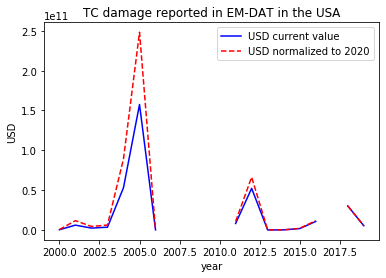

In [8]:
"""Yearly TC damages in the USA, normalized and current"""

yearly_damage_normalized_2020 = emdat_impact_yearlysum(['USA'], 'Tropical cyclone', emdat_file_path, year_range=None, \
                         reference_year=2020)

yearly_damage_current = emdat_impact_yearlysum(['USA'], 'TC', emdat_file_path)

import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1)
axis.plot(yearly_damage_current.year, yearly_damage_current.impact, 'b', label='USD current value')
axis.plot(yearly_damage_normalized_2020.year, yearly_damage_normalized_2020.impact_scaled, 'r--', label='USD normalized to 2020')
plt.legend()
axis.set_title('TC damage reported in EM-DAT in the USA')
axis.set_xlabel('year')
axis.set_ylabel('USD')